## <b>Further Preprocessing & Handling Missing Data</b>
Before feeding your data into a machine learning algorithm, you need to clean and prepare it.

In [ ]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    

In [6]:
# Lets remove the income_cat column
for sett in (strat_train_set, strat_test_set):
    sett.drop("income_cat", axis=1, inplace=True)

In [22]:
#Removing the total price column
for col in (strat_train_set , strat_test_set):
    col.drop("Total_Price" , axis = 1 , inplace = True)

In [7]:
df = strat_train_set.copy()

In [24]:
df = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

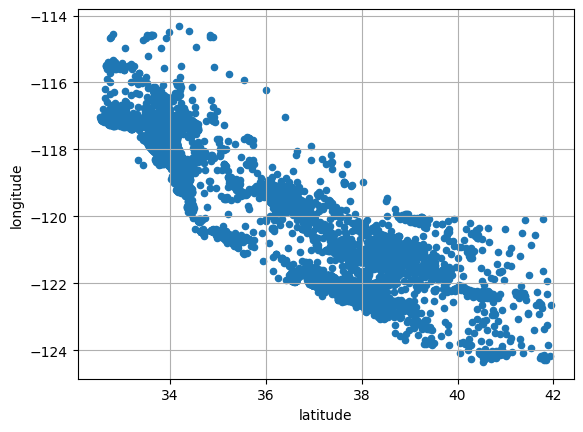

In [8]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="latitude", y="longitude", grid=True)

<Axes: xlabel='latitude', ylabel='longitude'>

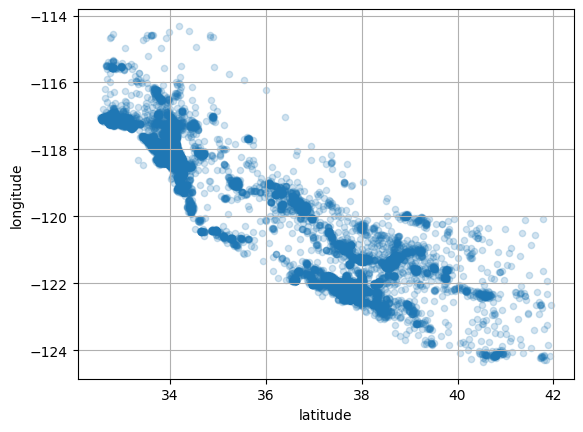

In [9]:
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, alpha=0.2)

<Axes: xlabel='latitude', ylabel='longitude'>

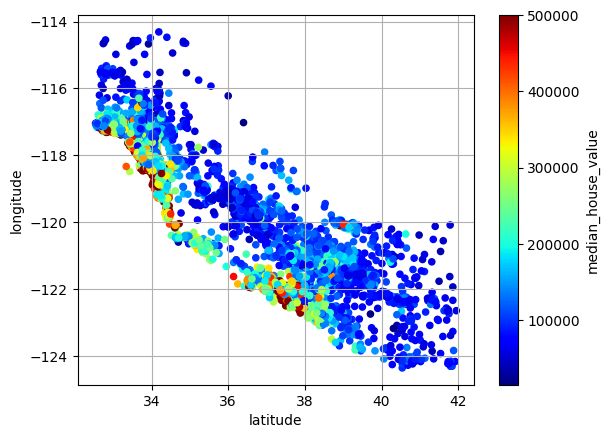

In [10]:
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, cmap="jet", c="median_house_value")

In [11]:
df.drop(labels="ocean_proximity", inplace=True, axis=1)
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

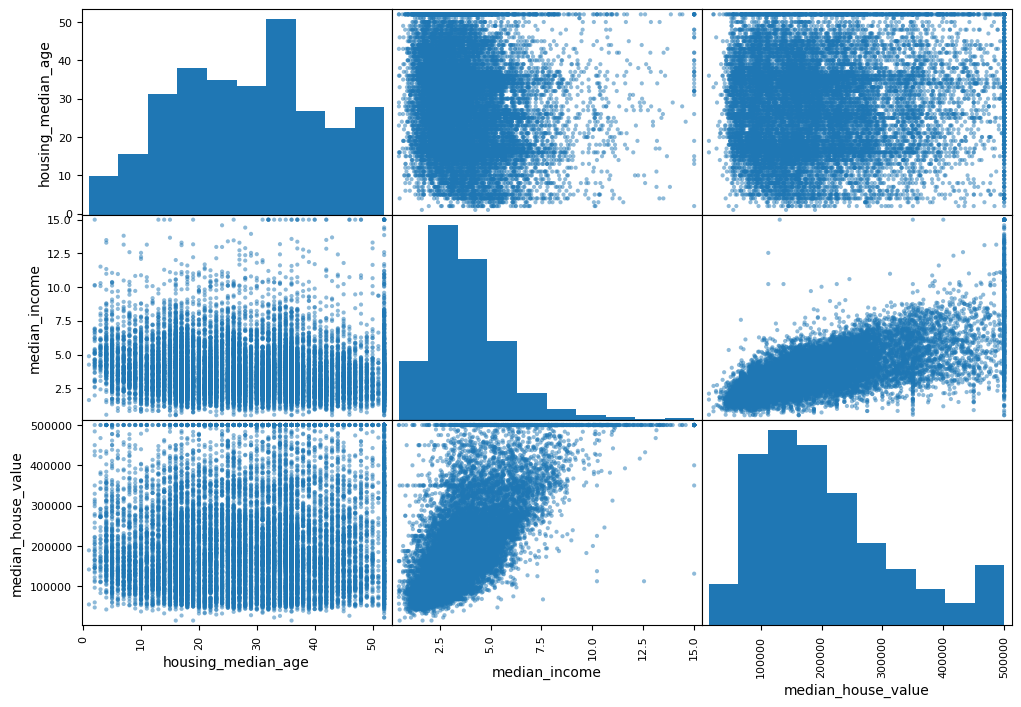

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["housing_median_age", "median_income", "median_house_value"]
scatter_matrix(df[attributes], figsize=(12, 8))

### <B>Prepare Data for Training</b>
It’s best to write transformation functions instead of applying them manually. This ensures:

- Reproducibility on any dataset
- Reusability across projects
- Compatibility with live systems
- Easier experimentation

Start by creating a clean copy and separating the predictors and labels:

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### <b>Handling Missing Data</b>
Some features, like total_bedrooms, contain missing values. You can:

1. Drop rows with missing values
2. Drop the entire column
3. Impute missing values (recommended)

We'll use option 3 using SimpleImputer from Scikit-Learn, which allows consistent handling across all datasets (train, test, new data):

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


This computes the median for each numerical column and stores it in `imputer.statistics_:`

In [ ]:
>>> imputer.statistics_
([-118.51 ,  34.26 ,  29. , 2125. , 434. , 1167. , 408. , 3.5385])

[-118.51, 34.26, 29.0, 2125.0, 434.0, 1167.0, 408.0, 3.5385]

Now apply the learned medians to transform the data:

In [20]:
X = imputer.transform(housing_num)

In [21]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]], shape=(16512, 8))

### <B>Other available strategies:</b>

- `"mean"` – replaces with mean value

- `"most_frequent"` – for the most common value (can handle categorical)

- `"constant"` – fill with a fixed value using fill_value=...